In [1]:
import requests
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import Output

## Visualize Addy

In [26]:
def get_satellite_image(api_key, location, zoom=80, size="600x600", save=False):
    base_url = "https://maps.googleapis.com/maps/api/staticmap?"
    params = {
        "center": location,
        "zoom": str(zoom),
        "size": size,
        "maptype": "satellite",
        "key": api_key,
        "markers": f"{location}"
    }

    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        raise Exception(f"Failed to download the image. Status code: {response.status_code}")

    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")

    if save:
        with open("satellite_image.jpg", "wb") as img:
            img.write(response.content)

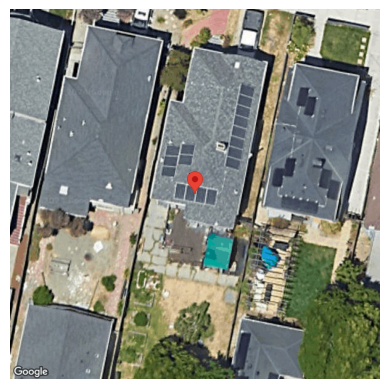

In [27]:
api_key = os.environ.get("GOOGLE_MAPS_API_KEY")
location = "825 30th St, Oakland, CA 94608"
get_satellite_image(api_key, location, zoom=21)